### 0. Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import pickle
import time
from KNN_Shapley import get_VN, get_true_KNN, compute_KNN_shapley, compute_KNN_Asymmetric_Shapley, KNN_LOO
from performance_plot import removing_sequential_data, adding_sequential_data, final_plot

### 1. Load Data

In [2]:
# Load data
n_samples = 10
num_samples_per_class_trn, num_samples_per_class_tst = 100, 50
shift_limit_dx, shift_limit_dy, scale_limit, rotate_limit = 0.0625, 0.0625, 0.1, 45
param_setting = "num_samples_per_class_trn={}_num_samples_per_class_tst={}_shift_dx={}_shift_dy={}_scale={}_rotate={}".format(num_samples_per_class_trn, num_samples_per_class_tst, shift_limit_dx, shift_limit_dy, scale_limit, rotate_limit)

X_ori_lst, y_ori_lst, X_aug_lst, y_aug_lst, X_ori_aug_lst, y_ori_aug_lst, X_val_lst, y_val_lst = [], [], [], [], [], [], [], []
X_heldout_lst, y_heldout_lst = [], []

for i_sample in range(n_samples):
    with open("data/mnist_balanced_sample 2/augmented_sample{}_".format(i_sample+1) + param_setting + ".pickle", "rb") as fp:
        mydict = pickle.load(fp)

    X_ori_lst.append(mydict['X_ori'])
    y_ori_lst.append(mydict['y_ori'].astype('int64'))
    X_aug_lst.append(mydict['X_aug'])
    y_aug_lst.append(mydict['y_aug'].astype('int64'))
    X_ori_aug_lst.append(mydict['X_ori_aug'])
    y_ori_aug_lst.append(mydict['y_ori_aug'].astype('int64'))
    X_val_lst.append(mydict['X_val'])
    y_val_lst.append(mydict['y_val'].astype('int64'))
    
    num_samples_per_class_trn, num_samples_per_class_tst = 50, 50
    with open("data/mnist_balanced_sample/sample{}_num_samples_per_class_trn={}_num_samples_per_class_tst={}".format(i_sample+1, num_samples_per_class_trn, num_samples_per_class_tst) + '.pickle', "rb") as fp:
        mydict = pickle.load(fp)
    X_heldout_lst.append(mydict['X_heldout'].reshape(mydict['X_heldout'].shape[0], -1))
    y_heldout_lst.append(mydict['y_heldout'].astype('int64'))

s_class_dic = {0:np.asarray(range(len(X_ori_lst[0]))), 1:np.asarray(range(len(X_ori_lst[0]), len(X_ori_aug_lst[0])))}

In [3]:
X_ori_lst[0].shape, X_aug_lst[0].shape, X_ori_aug_lst[0].shape, X_val_lst[0].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [4]:
X_heldout_lst[0].shape, y_heldout_lst[0].shape

((1000, 784), (1000,))

In [5]:
X_ori_lst[1].shape, X_aug_lst[1].shape, X_ori_aug_lst[1].shape, X_val_lst[1].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [6]:
X_ori_lst[2].shape, X_aug_lst[2].shape, X_ori_aug_lst[2].shape, X_val_lst[2].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [7]:
X_ori_lst[3].shape, X_aug_lst[3].shape, X_ori_aug_lst[3].shape, X_val_lst[3].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [8]:
X_ori_lst[4].shape, X_aug_lst[4].shape, X_ori_aug_lst[4].shape, X_val_lst[4].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [9]:
X_ori_lst[5].shape, X_aug_lst[5].shape, X_ori_aug_lst[5].shape, X_val_lst[5].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [10]:
X_ori_lst[6].shape, X_aug_lst[6].shape, X_ori_aug_lst[6].shape, X_val_lst[6].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [11]:
X_ori_lst[7].shape, X_aug_lst[7].shape, X_ori_aug_lst[7].shape, X_val_lst[7].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [12]:
X_ori_lst[8].shape, X_aug_lst[8].shape, X_ori_aug_lst[8].shape, X_val_lst[8].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

In [13]:
X_ori_lst[9].shape, X_aug_lst[9].shape, X_ori_aug_lst[9].shape, X_val_lst[9].shape

((500, 784), (500, 784), (1000, 784), (500, 784))

### 2. Compute KNN Shapley and KNN Asymmetric Shapley

In [14]:
K = 5
n_samples = 10

In [16]:
for i_sample in range(n_samples):
    
    print('i_sample', i_sample)
    directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)

    # Train KNN Classifier
    x_ori_aug_knn_gt = get_true_KNN(X_ori_aug_lst[i_sample], X_val_lst[i_sample])  # train knn classifier
    
    # Compute KNN shapley
    start = time.time()
    knn_shaps = compute_KNN_shapley(y_ori_aug_lst[i_sample], x_ori_aug_knn_gt, y_val_lst[i_sample], K)
    end = time.time()
    print("Time to compute the exact symmetric shapley values for all data:", end - start)
    np.save(directory + 'ori_aug_sv_K={}_'.format(K) + param_setting, knn_shaps)
    
    # Compute KNN asymmetric shapley
    start = time.time()
    knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_ori_aug_lst[i_sample], x_ori_aug_knn_gt, 
                                                    y_val_lst[i_sample], K, s_class_dic)
    end = time.time()
    print("Time to compute the exact asymmetric shapley values for all data:", end - start)
    np.save(directory + 'ori_aug_asv_K={}_'.format(K) + param_setting, knn_asym_shaps)

i_sample 0


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 425.21it/s]


Time to compute the exact symmetric shapley values for all data: 1.177549123764038


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 54.36it/s]


Time to compute the exact asymmetric shapley values for all data: 12.006216287612915
i_sample 1


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 426.46it/s]


Time to compute the exact symmetric shapley values for all data: 1.173851728439331


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 53.78it/s]


Time to compute the exact asymmetric shapley values for all data: 12.105501890182495
i_sample 2


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 425.80it/s]


Time to compute the exact symmetric shapley values for all data: 1.175563097000122


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 54.82it/s]


Time to compute the exact asymmetric shapley values for all data: 11.893451690673828
i_sample 3


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 427.23it/s]


Time to compute the exact symmetric shapley values for all data: 1.171928882598877


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 54.08it/s]


Time to compute the exact asymmetric shapley values for all data: 12.034931898117065
i_sample 4


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 426.08it/s]


Time to compute the exact symmetric shapley values for all data: 1.1752400398254395


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 53.57it/s]


Time to compute the exact asymmetric shapley values for all data: 12.127709865570068
i_sample 5


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 426.08it/s]


Time to compute the exact symmetric shapley values for all data: 1.17507004737854


100%|█████████████████████████████████████████| 500/500 [00:08<00:00, 55.92it/s]


Time to compute the exact asymmetric shapley values for all data: 11.729635953903198
i_sample 6


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 427.64it/s]


Time to compute the exact symmetric shapley values for all data: 1.1701998710632324


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 53.84it/s]


Time to compute the exact asymmetric shapley values for all data: 12.07200288772583
i_sample 7


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 426.48it/s]


Time to compute the exact symmetric shapley values for all data: 1.1738801002502441


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 54.04it/s]


Time to compute the exact asymmetric shapley values for all data: 12.0416259765625
i_sample 8


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 427.16it/s]


Time to compute the exact symmetric shapley values for all data: 1.1719427108764648


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 54.04it/s]


Time to compute the exact asymmetric shapley values for all data: 12.035047054290771
i_sample 9


100%|████████████████████████████████████████| 500/500 [00:01<00:00, 429.05it/s]


Time to compute the exact symmetric shapley values for all data: 1.1669108867645264


100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 53.49it/s]

Time to compute the exact asymmetric shapley values for all data: 12.129670858383179


### 5. Load SV, ASV and LOO values

In [20]:
knn_sv_lst, mc_sv_lst, knn_asv_lst, mc_asv_lst, loo_lst, rand_lst = [], [], [], [], [], []
seeds = [42, 123, 2020, 314, 2021, 111, 999, 777, 1010, 888]
num_permutations = 3000

for i_sample in range(n_samples):
    
    print(' ')
    print(' ')
    print('i_sample', i_sample)
    directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
    # Load mc-sv
    with open(directory + 'tmc_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_sv_dict = pickle.load(fp)
    mc_sv_dict['marginals_tmc'] = mc_sv_dict['marginals_tmc'][:num_permutations]
    mc_sv_dict['idxs_tmc'] = mc_sv_dict['idxs_tmc'][:num_permutations]
    mc_sv_dict['vals_tmc'] = np.mean(mc_sv_dict['marginals_tmc'], axis=0)
    with open(directory + 'tmc_shapley_model=KNN_metric=accuracy.pkl', 'wb') as fp:
        pickle.dump(mc_sv_dict, fp)
    
    # Load mc-asv
    with open(directory + 'tmc_asymmetric_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_asv_dict = pickle.load(fp)
    mc_asv_dict['marginals_tmc'] = mc_asv_dict['marginals_tmc'][:num_permutations]
    mc_asv_dict['idxs_tmc'] = mc_asv_dict['idxs_tmc'][:num_permutations]
    mc_asv_dict['vals_tmc'] = np.mean(mc_asv_dict['marginals_tmc'], axis=0)
    with open(directory + 'tmc_asymmetric_shapley_model=KNN_metric=accuracy.pkl', 'wb') as fp:
        pickle.dump(mc_asv_dict, fp)

 
 
i_sample 0
 
 
i_sample 1
 
 
i_sample 2
 
 
i_sample 3
 
 
i_sample 4
 
 
i_sample 5
 
 
i_sample 6
 
 
i_sample 7
 
 
i_sample 8
 
 
i_sample 9


In [21]:
mc_sv_dict.keys()

dict_keys(['vals_tmc', 'marginals_tmc', 'idxs_tmc'])

In [22]:
knn_sv_lst, mc_sv_lst, knn_asv_lst, mc_asv_lst, loo_lst, rand_lst = [], [], [], [], [], []
seeds = [42, 123, 2020, 314, 2021, 111, 999, 777, 1010, 888]
num_permutations = 2000

for i_sample in range(n_samples):
    
    print(' ')
    print(' ')
    print('i_sample', i_sample)
    directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
    # Load knn-sv
    knn_sv_lst.append(np.load(directory + 'ori_aug_sv_K={}_'.format(K) + param_setting + '.npy'))

    # Load knn-asv
    knn_asv_lst.append(np.load(directory + 'ori_aug_asv_K={}_'.format(K) + param_setting + '.npy'))

    # Load loo values
    with open(directory + 'loo_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        loo_dict = pickle.load(fp)
    loo_knn = loo_dict['loo']
    loo_lst.append(loo_knn)
    print('loo_knn.shape', loo_knn.shape)
    
    # Load mc-sv
    with open(directory + 'tmc_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_sv_dict = pickle.load(fp)
    mc_sv_knn = np.mean(mc_sv_dict['marginals_tmc'][:num_permutations], axis=0)
    mc_sv_lst.append(mc_sv_knn)
    print('mc_sv_knn.shape', mc_sv_dict['marginals_tmc'].shape,
          mc_sv_dict['marginals_tmc'][:num_permutations].shape)
    
    # Load mc-asv
    with open(directory + 'tmc_asymmetric_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_asv_dict = pickle.load(fp)
    mc_asv_knn = np.mean(mc_asv_dict['marginals_tmc'][:num_permutations], axis=0)
    mc_asv_lst.append(mc_asv_knn)
    print('mc_asv_knn.shape', mc_asv_dict['marginals_tmc'].shape,
          mc_asv_dict['marginals_tmc'][:num_permutations].shape)
        
    # random permutation of values (baseline)
    seed = seeds[i_sample-1]
    np.random.seed(seed)
    rand_lst.append(np.random.rand(len(X_ori_aug_lst[i_sample])))

 
 
i_sample 0
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 1
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 2
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 3
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 4
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 5
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 6
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 7
loo_knn.shape (1000,)
mc_sv_knn.shape (3000, 1000) (2000, 1000)
mc_asv_knn.shape (3000, 1000) (2000, 1000)
 
 
i_sample 8
loo_knn.s

### 6. Performance plot (MNIST)

In [23]:
import matplotlib.pyplot as plt

def removing_sequential_data(shap_vals_lst, shap_vals_algo_lst, X_ori_aug, y_ori_aug, X_test, y_test,
                             num_trn_ori, ind_arr, directory, model, metrics, plot_every_percentage, 
                             low_value_first=True):

    frac_data_removed = []
    sort_val_idxs_lst = []
    ind_arr_lst = []

    num_trn = len(X_ori_aug)
    num_trn_aug = num_trn - num_trn_ori

    for j in range(len(shap_vals_lst)):
        if low_value_first:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[j]))
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[j])])
        else:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[j])[::-1])
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[j])[::-1]])

    acc_score_lst = [[] for _ in range(len(shap_vals_lst))]
    
    for i in range(0, num_trn_aug, round(num_trn_aug * plot_every_percentage)):
        frac_data_removed.append(round(i / num_trn_aug, 2) * 100)
        for j in range(len(shap_vals_lst)):
            selected_idxs_j = np.concatenate((sort_val_idxs_lst[j][ind_arr_lst[j] == 1], sort_val_idxs_lst[j][ind_arr_lst[j] == 0][i:]))
            model.fit(X_ori_aug[selected_idxs_j], y_ori_aug[selected_idxs_j])
            preds = model.predict(X_test)
            if metrics=='acc':
                acc = accuracy_score(y_test, preds)
            elif metrics=='auc':
                acc = roc_auc_score(y_test, preds)
            acc_score_lst[j].append(acc)

    data_dict = dict(zip(shap_vals_algo_lst, acc_score_lst))
    data_dict['frac_data_removed'] = frac_data_removed

    with open(directory, "wb") as fp:
        pickle.dump(data_dict, fp)

    for i in range(len(shap_vals_algo_lst)):
        plt.plot(data_dict['frac_data_removed'], data_dict[shap_vals_algo_lst[i]], label=shap_vals_algo_lst[i])
    plt.legend(loc='best')
    plt.show()
    return


def adding_sequential_data(shap_vals_lst, shap_vals_algo_lst, X_ori_aug, y_ori_aug, X_test, y_test,
                            num_trn_ori, ind_arr, directory, model, metrics, plot_every_percentage, 
                           low_value_first=True):

    frac_data_removed = []
    sort_val_idxs_lst = []
    ind_arr_lst = []

    num_trn = len(X_ori_aug)
    num_trn_aug = num_trn - num_trn_ori

    for i in range(len(shap_vals_lst)):
        if low_value_first:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[i]))
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[i])])
        else:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[i])[::-1])
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[i])[::-1]])

    acc_score_lst = [[] for _ in range(len(shap_vals_lst))]

    for i in range(0, num_trn_aug, round(num_trn_aug * plot_every_percentage)):
        frac_data_removed.append(round(i / num_trn_aug, 2) * 100)
        for j in range(len(shap_vals_lst)):
            selected_idxs_j = np.concatenate((sort_val_idxs_lst[j][ind_arr_lst[j] == 1], sort_val_idxs_lst[j][ind_arr_lst[j] == 0][:i]))
            model.fit(X_ori_aug[selected_idxs_j], y_ori_aug[selected_idxs_j])
            preds = model.predict(X_test)
            if metrics=='acc':
                acc = accuracy_score(y_test, preds)
            elif metrics=='auc':
                acc = roc_auc_score(y_test, preds)
            acc_score_lst[j].append(acc)

    data_dict = dict(zip(shap_vals_algo_lst, acc_score_lst))
    data_dict['frac_data_added'] = frac_data_removed

    with open(directory, "wb") as fp:
        pickle.dump(data_dict, fp)

    for i in range(len(shap_vals_algo_lst)):
        plt.plot(data_dict['frac_data_added'], data_dict[shap_vals_algo_lst[i]], label=shap_vals_algo_lst[i])
    plt.legend(loc='best')
    plt.show()
    return

i_sample 0
Removing low value augmented data experiment started...


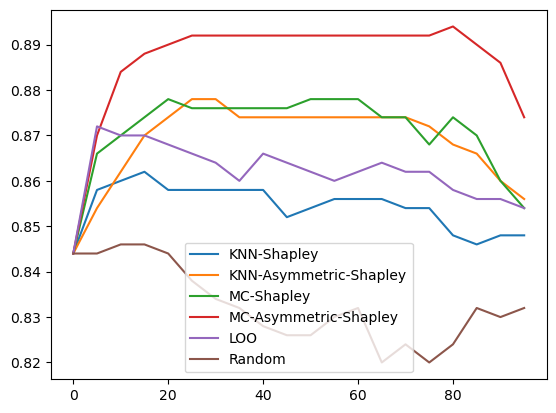

Removing high value augmented data experiment started...


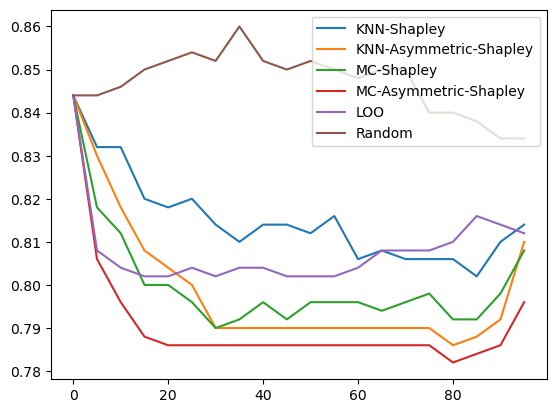

Adding low value augmented data experiment started...


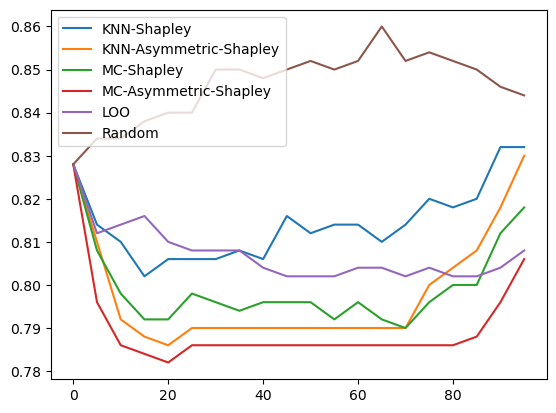

Adding high value augmented data experiment started...


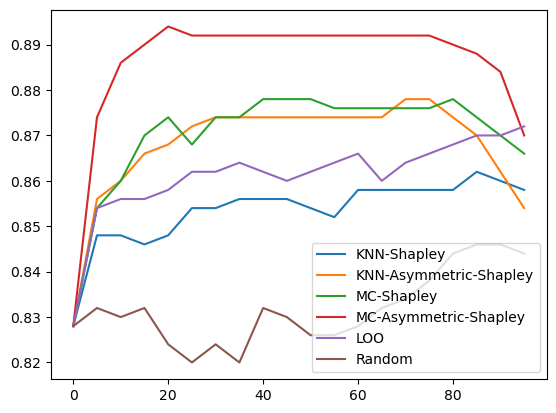

i_sample 1
Removing low value augmented data experiment started...


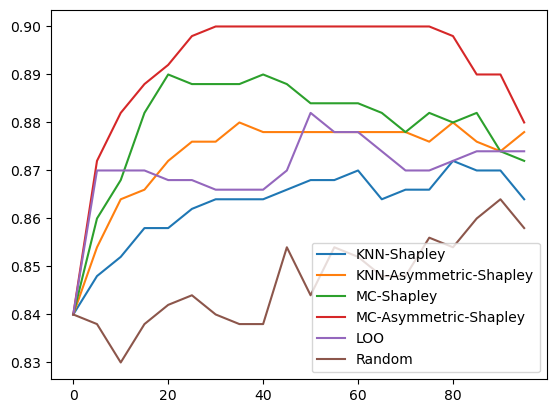

Removing high value augmented data experiment started...


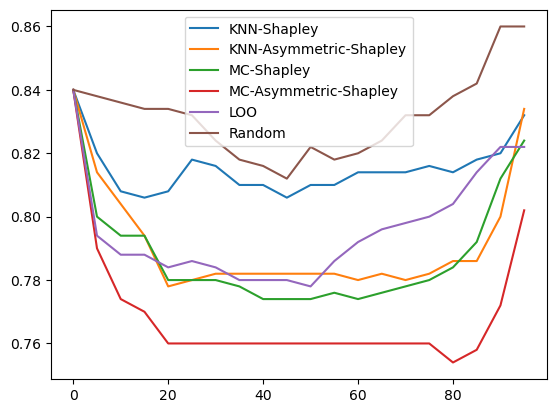

Adding low value augmented data experiment started...


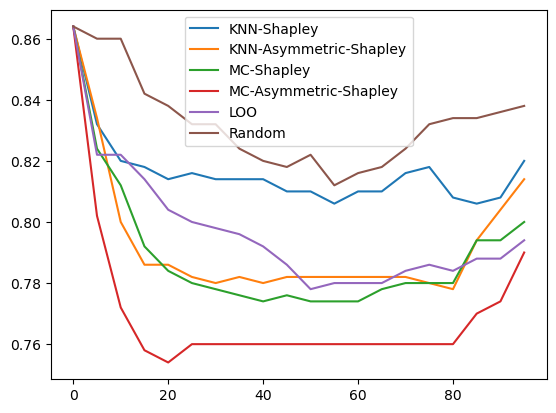

Adding high value augmented data experiment started...


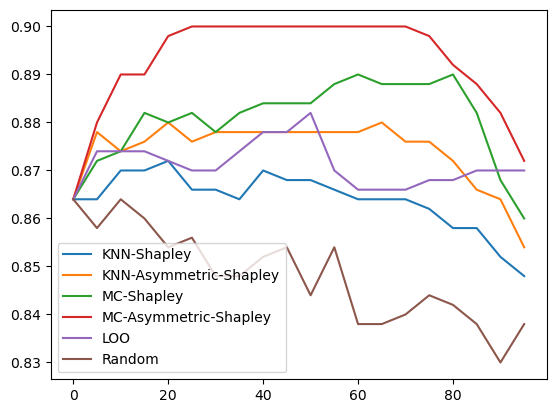

i_sample 2
Removing low value augmented data experiment started...


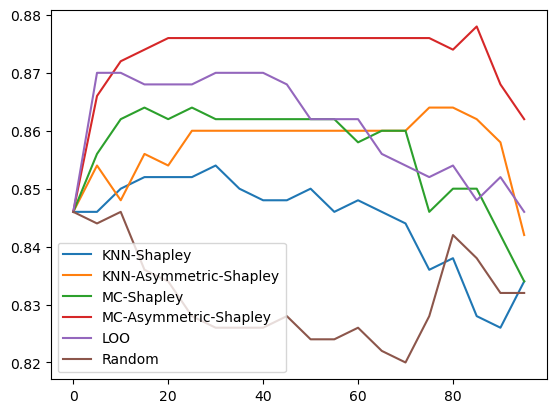

Removing high value augmented data experiment started...


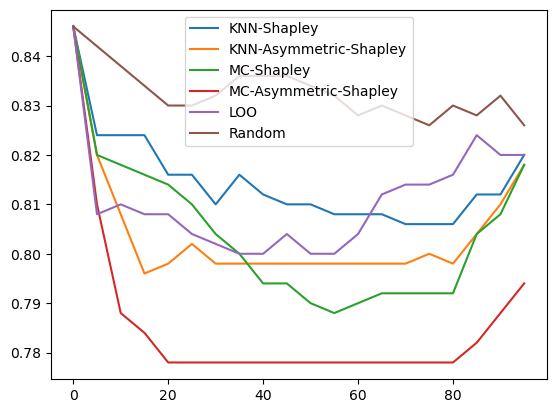

Adding low value augmented data experiment started...


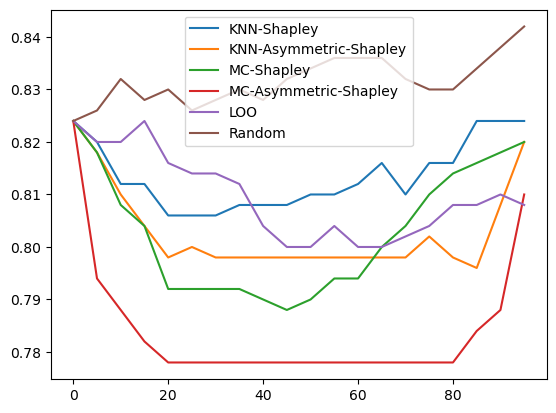

Adding high value augmented data experiment started...


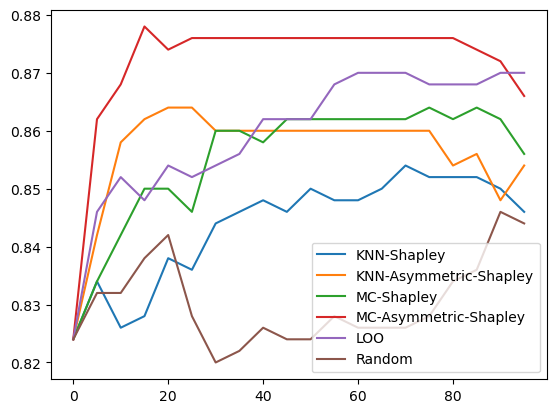

i_sample 3
Removing low value augmented data experiment started...


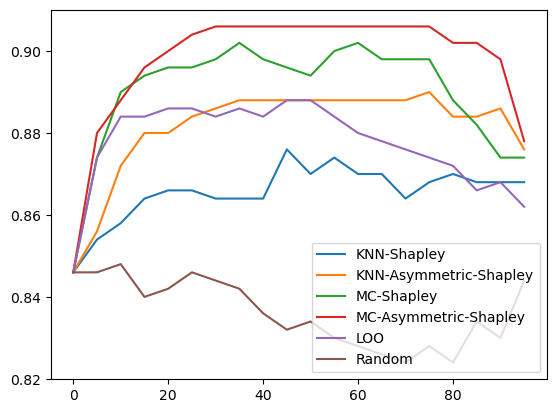

Removing high value augmented data experiment started...


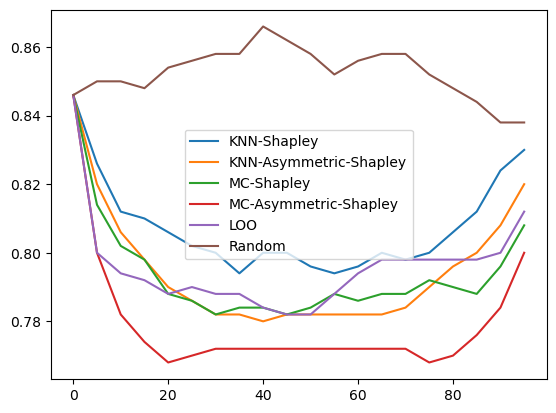

Adding low value augmented data experiment started...


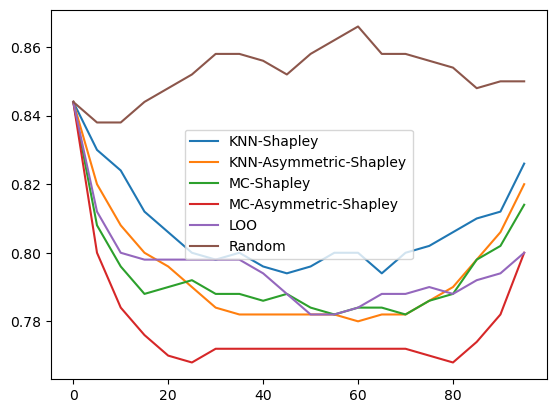

Adding high value augmented data experiment started...


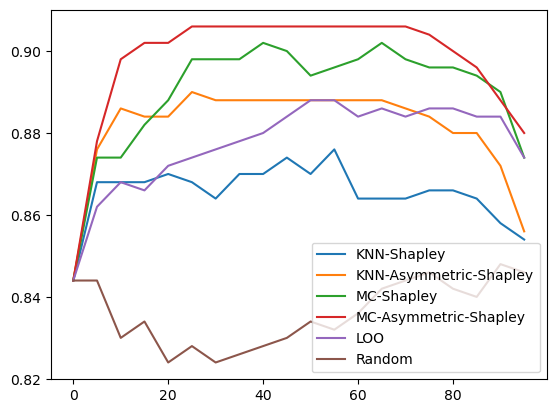

i_sample 4
Removing low value augmented data experiment started...


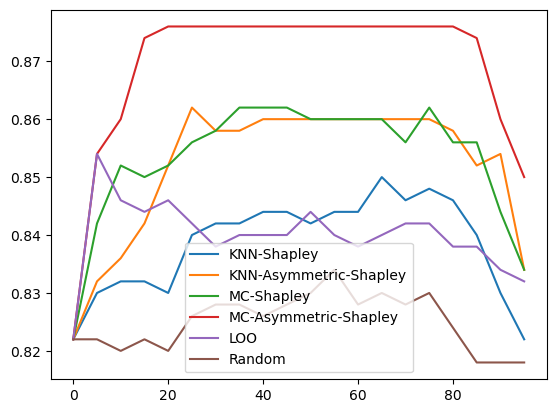

Removing high value augmented data experiment started...


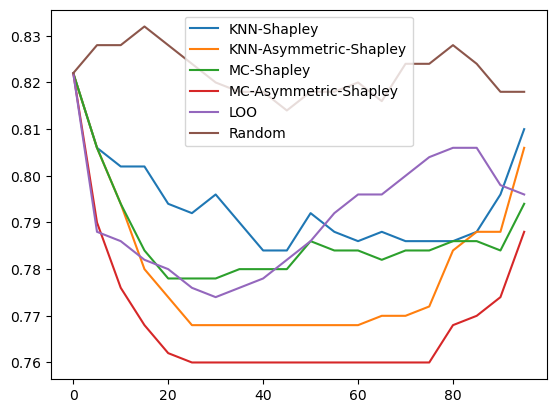

Adding low value augmented data experiment started...


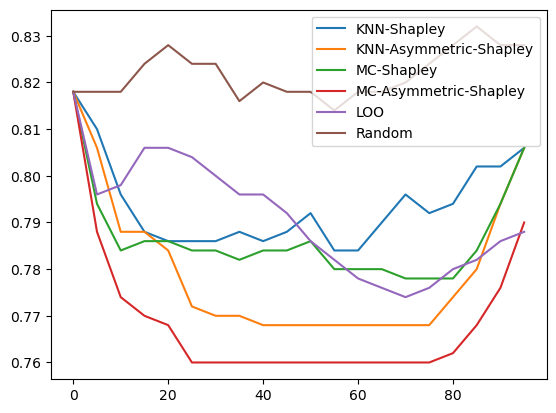

Adding high value augmented data experiment started...


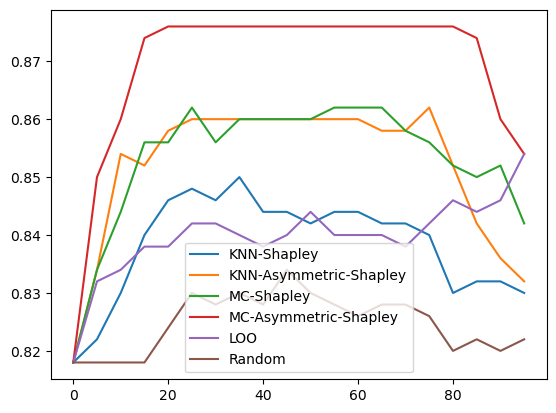

i_sample 5
Removing low value augmented data experiment started...


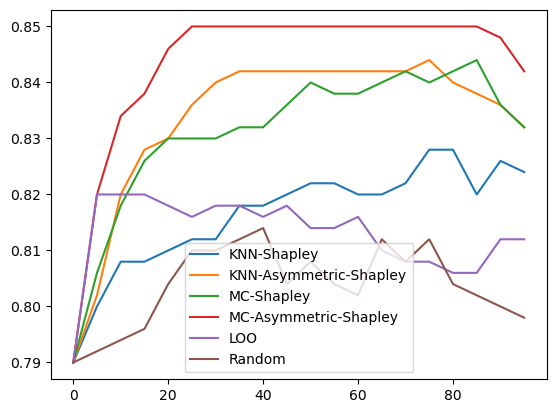

Removing high value augmented data experiment started...


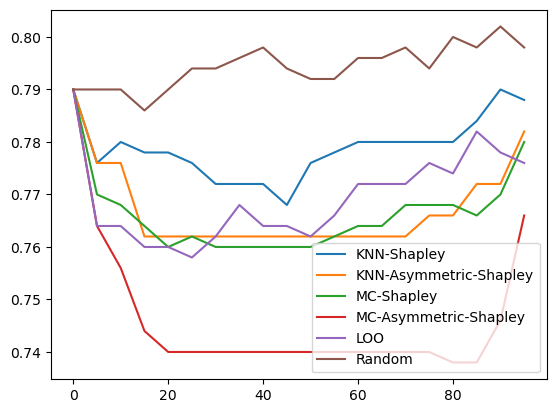

Adding low value augmented data experiment started...


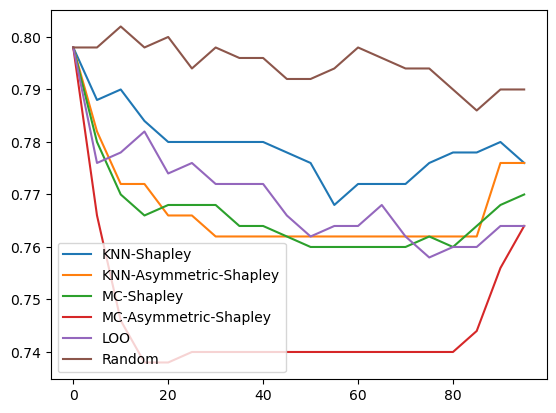

Adding high value augmented data experiment started...


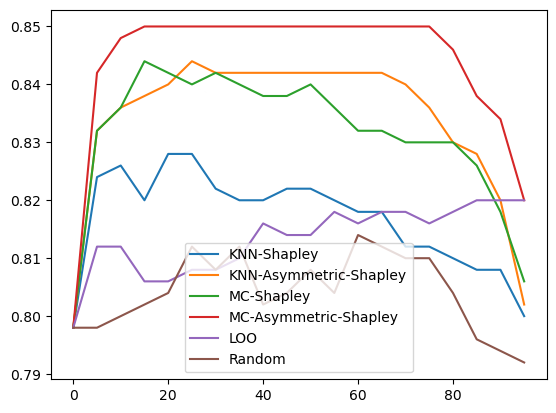

i_sample 6
Removing low value augmented data experiment started...


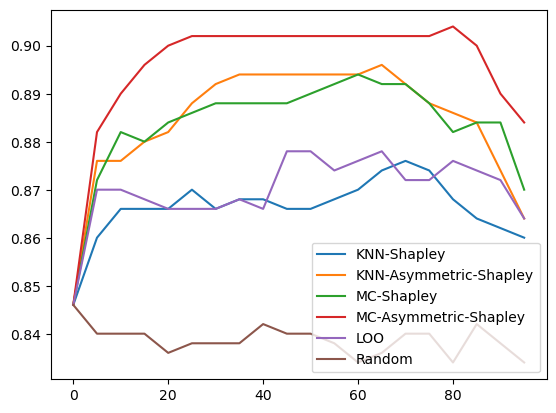

Removing high value augmented data experiment started...


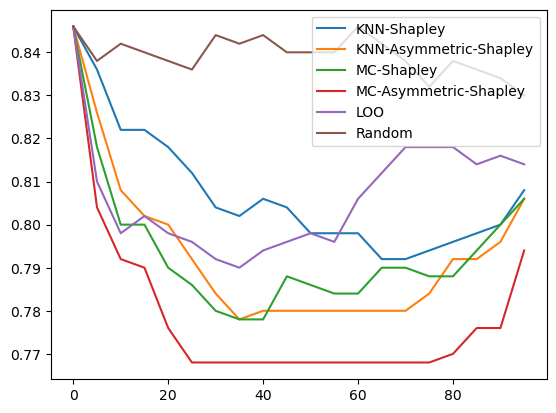

Adding low value augmented data experiment started...


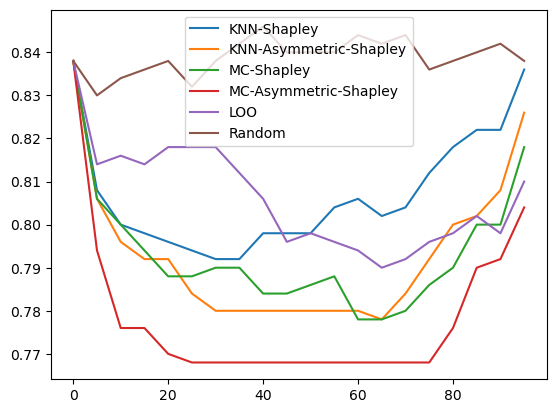

Adding high value augmented data experiment started...


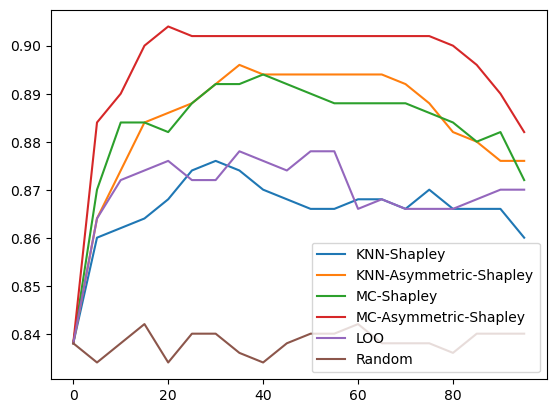

i_sample 7
Removing low value augmented data experiment started...


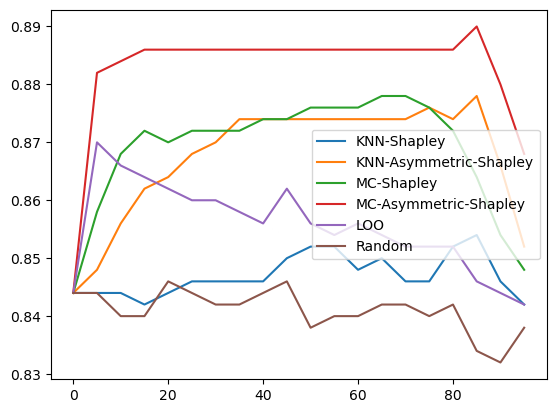

Removing high value augmented data experiment started...


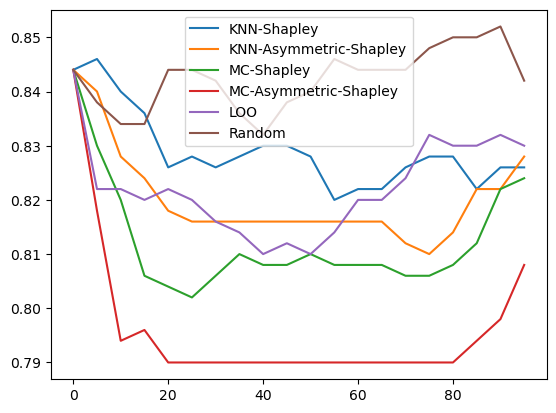

Adding low value augmented data experiment started...


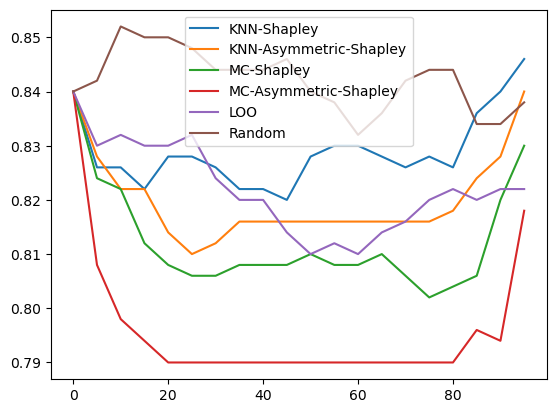

Adding high value augmented data experiment started...


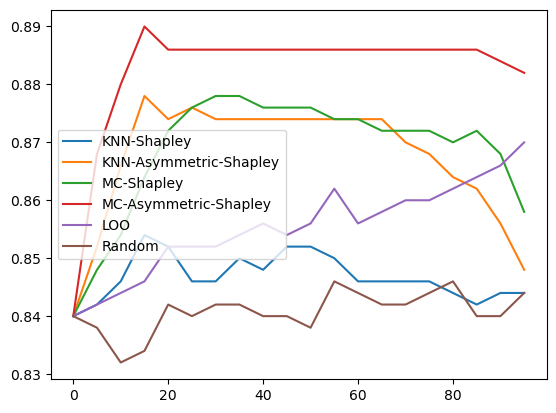

i_sample 8
Removing low value augmented data experiment started...


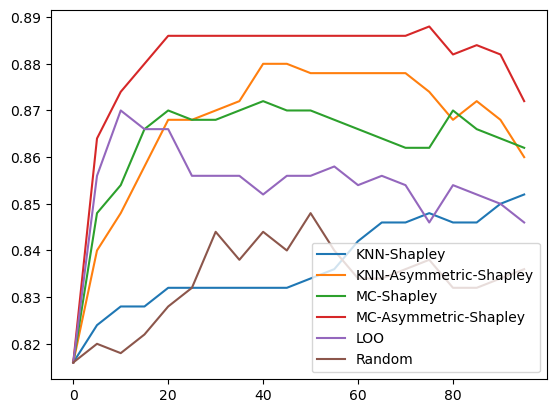

Removing high value augmented data experiment started...


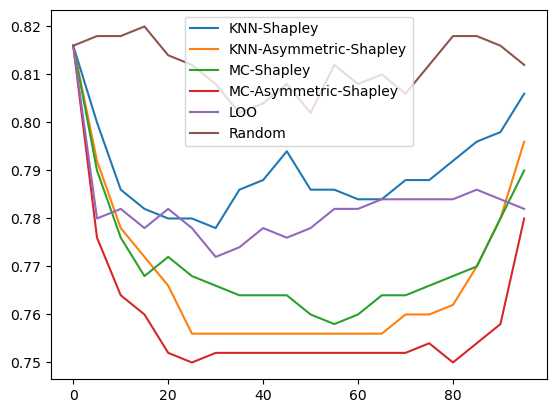

Adding low value augmented data experiment started...


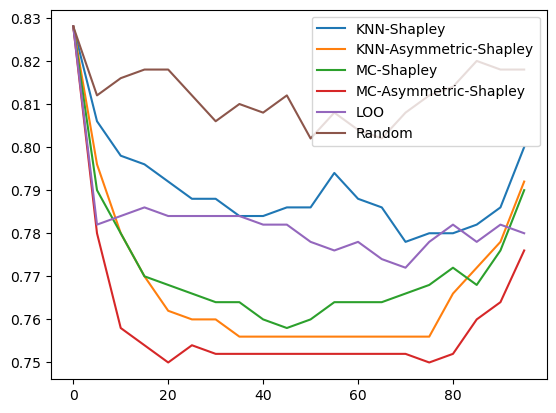

Adding high value augmented data experiment started...


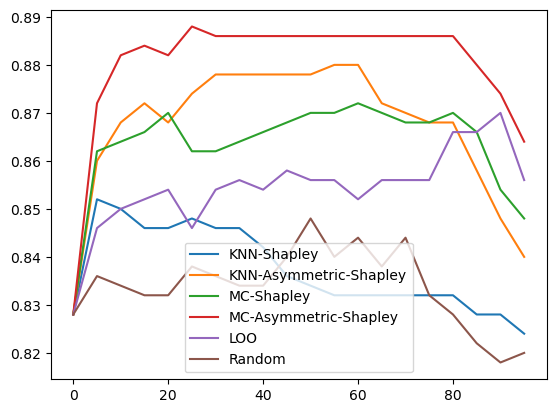

i_sample 9
Removing low value augmented data experiment started...


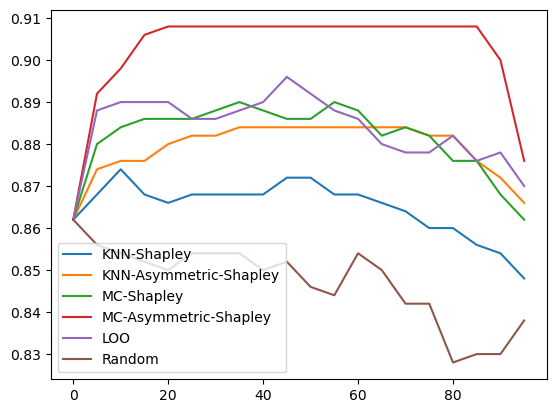

Removing high value augmented data experiment started...


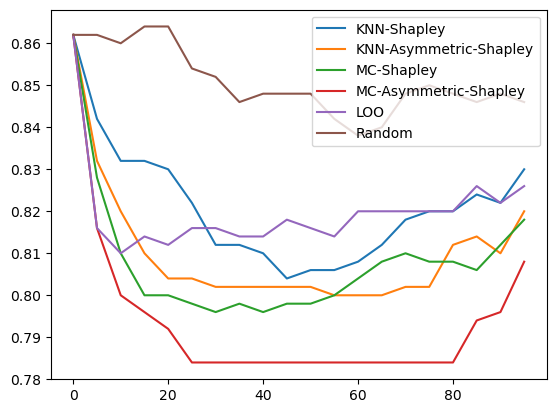

Adding low value augmented data experiment started...


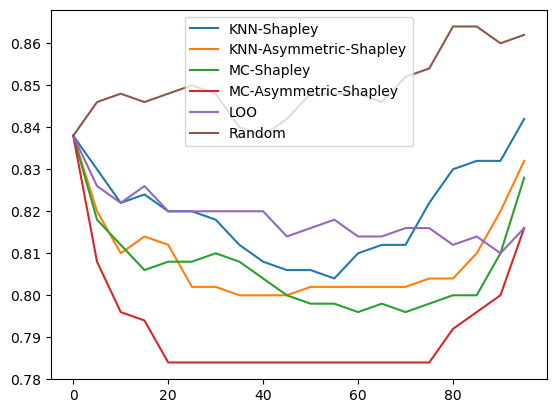

Adding high value augmented data experiment started...


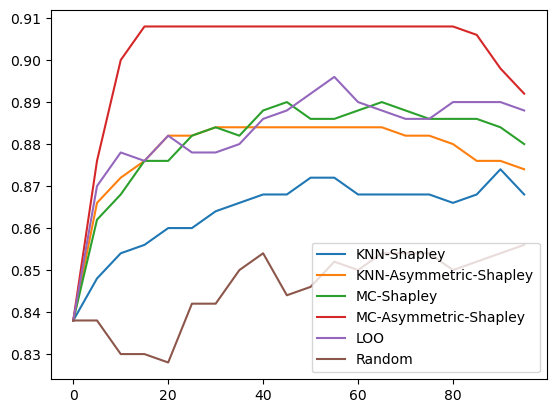

In [24]:
# Performance plot: validation data

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
model = KNN(n_neighbors=K, weights='uniform')
modelname = 'knn'

for i_sample in range(n_samples):
    
    print('i_sample', i_sample)
    directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
    shap_vals_lst = [knn_sv_lst[i_sample], knn_asv_lst[i_sample], mc_sv_lst[i_sample], 
                     mc_asv_lst[i_sample], loo_lst[i_sample], rand_lst[i_sample]]
    
    shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
                          'MC-Shapley', 'MC-Asymmetric-Shapley', 
                          'LOO', 'Random']
    
    X_ori = X_ori_lst[i_sample]
    X_ori_aug = X_ori_aug_lst[i_sample]
    y_ori_aug = y_ori_aug_lst[i_sample]
    X_val = X_val_lst[i_sample]
    y_val = y_val_lst[i_sample]
    
    num_trn_ori = len(X_ori)
    ind_arr = np.zeros(len(X_ori_aug))
    ind_arr[:len(X_ori)] = 1
    
    remove_low_directory = directory + 'remove_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    remove_high_directory = directory + 'remove_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_low_directory = directory + 'add_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_high_directory = directory + 'add_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'

    print('Removing low value augmented data experiment started...')
    removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                            X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_val, y_test=y_val,
                            num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=remove_low_directory,
                            plot_every_percentage = 0.05, 
                            model=model, metrics='acc', low_value_first=True)

    print('Removing high value augmented data experiment started...')
    removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                            X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_val, y_test=y_val,
                            num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=remove_high_directory,
                            plot_every_percentage = 0.05, 
                            model=model, metrics='acc', low_value_first=False)

    print('Adding low value augmented data experiment started...')
    adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                          X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_val, y_test=y_val,
                          num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=add_low_directory,
                          plot_every_percentage = 0.05, 
                          model=model, metrics='acc', low_value_first=True)

    print('Adding high value augmented data experiment started...')
    adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                          X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_val, y_test=y_val,
                          num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=add_high_directory,
                          plot_every_percentage = 0.05, 
                          model=model, metrics='acc', low_value_first=False)

i_sample 0
Removing low value augmented data experiment started...


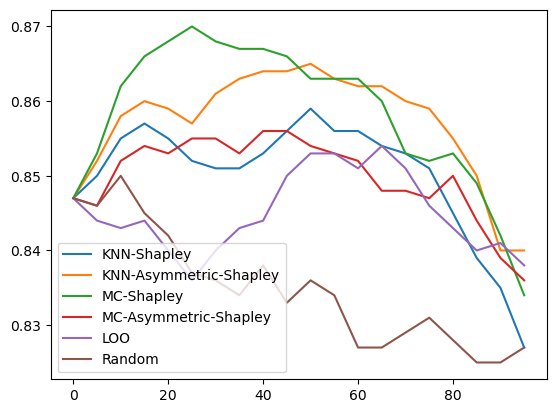

Removing high value augmented data experiment started...


KeyboardInterrupt: 

In [25]:
# # Performance plot: heldout data

# from sklearn.neighbors import KNeighborsClassifier as KNN
# model = KNN(n_neighbors=K, weights='uniform')
# modelname = 'knn'

# for i_sample in range(n_samples):
    
#     print('i_sample', i_sample)
#     directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
#     shap_vals_lst = [knn_sv_lst[i_sample], knn_asv_lst[i_sample], mc_sv_lst[i_sample], 
#                      mc_asv_lst[i_sample], loo_lst[i_sample], rand_lst[i_sample]]
    
#     shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
#                           'MC-Shapley', 'MC-Asymmetric-Shapley', 
#                           'LOO', 'Random']
    
#     X_ori = X_ori_lst[i_sample]
#     X_ori_aug = X_ori_aug_lst[i_sample]
#     y_ori_aug = y_ori_aug_lst[i_sample]
#     X_val = X_val_lst[i_sample]
#     y_val = y_val_lst[i_sample]
#     X_heldout = X_heldout_lst[i_sample]
#     y_heldout = y_heldout_lst[i_sample]
    
#     num_trn_ori = len(X_ori)
#     ind_arr = np.zeros(len(X_ori_aug))
#     ind_arr[:len(X_ori)] = 1
    
#     remove_low_directory = directory + 'remove_low_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     remove_high_directory = directory + 'remove_high_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     add_low_directory = directory + 'add_low_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     add_high_directory = directory + 'add_high_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'

#     print('Removing low value augmented data experiment started...')
#     removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
#                             X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_heldout, y_test=y_heldout,
#                             num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=remove_low_directory,
#                             plot_every_percentage = 0.05, 
#                             model=model, metrics='acc', low_value_first=True)

#     print('Removing high value augmented data experiment started...')
#     removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
#                             X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_heldout, y_test=y_heldout,
#                             num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=remove_high_directory,
#                             plot_every_percentage = 0.05, 
#                             model=model, metrics='acc', low_value_first=False)

#     print('Adding low value augmented data experiment started...')
#     adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
#                           X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_heldout, y_test=y_heldout,
#                           num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=add_low_directory,
#                           plot_every_percentage = 0.05, 
#                           model=model, metrics='acc', low_value_first=True)

#     print('Adding high value augmented data experiment started...')
#     adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
#                           X_ori_aug=X_ori_aug, y_ori_aug=y_ori_aug, X_test=X_heldout, y_test=y_heldout,
#                           num_trn_ori=num_trn_ori, ind_arr=ind_arr, directory=add_high_directory,
#                           plot_every_percentage = 0.05, 
#                           model=model, metrics='acc', low_value_first=False)

### 7. Final plot (MNIST)

In [26]:
shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
                      'MC-Shapley', 'MC-Asymmetric-Shapley', 'LOO', 'Random']
remove_low_avg, remove_high_avg, add_low_avg, add_high_avg = {}, {}, {}, {}
modelname = 'knn'

for i_sample in range(n_samples):
    
    print('i_sample', i_sample)
    directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
    remove_low_directory = directory + 'remove_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    remove_high_directory = directory + 'remove_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_low_directory = directory + 'add_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_high_directory = directory + 'add_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'

    with open(remove_low_directory, 'rb') as fp:
        remove_low = pickle.load(fp)
    
    with open(remove_high_directory, 'rb') as fp:
        remove_high = pickle.load(fp)

    with open(add_low_directory, 'rb') as fp:
        add_low = pickle.load(fp)

    with open(add_high_directory, 'rb') as fp:
        add_high = pickle.load(fp)
    
    if i_sample == 0:
        for key in remove_low.keys():
            remove_low_avg[key] = [np.asarray(remove_low[key])]
            remove_high_avg[key] = [np.asarray(remove_high[key])]
    else:
        for key in remove_low.keys():
            remove_low_avg[key].append(np.asarray(remove_low[key]))
            remove_high_avg[key].append(np.asarray(remove_high[key]))
    
    if i_sample == 0:
        for key in add_low.keys():
            add_low_avg[key] = [np.asarray(add_low[key])]
            add_high_avg[key] = [np.asarray(add_high[key])]
    else:
        for key in add_low.keys():
            add_low_avg[key].append(np.asarray(add_low[key]))
            add_high_avg[key].append(np.asarray(add_high[key]))

            
for key in remove_high_avg.keys():
    if key == 'frac_data_removed':
        remove_high_avg[key] = remove_high_avg[key][0]
        remove_low_avg[key] = remove_low_avg[key][0]
    else:
        remove_high_avg[key] = np.vstack(remove_high_avg[key])
        remove_low_avg[key] = np.vstack(remove_low_avg[key])


for key in add_high_avg.keys():
    if key == 'frac_data_added':
        add_high_avg[key] = add_high_avg[key][0]
        add_low_avg[key] = add_low_avg[key][0]
    else:
        add_high_avg[key] = np.vstack(add_high_avg[key])
        add_low_avg[key] = np.vstack(add_low_avg[key])

i_sample 0
i_sample 1
i_sample 2
i_sample 3
i_sample 4
i_sample 5
i_sample 6
i_sample 7
i_sample 8
i_sample 9


In [27]:
def final_plot_avg(remove_high_avg, remove_low_avg, add_high_avg, add_low_avg, shap_algo_lst, dataset,
                   remove_add_ratio, xticks, root_dir, modelname, imbalance=False, experiment='ex1'):
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 2))
    dataset_font, title_font, label_font, ticks_font, legend_font = 15, 10, 8, 8, 6
    
    # Define the color map for the methods
    color_map = {
        'KNN-Shapley': 'purple',
        'KNN-Asymmetric-Shapley': 'orange',
        'MC-Shapley': 'blue',
        'MC-Asymmetric-Shapley': 'red',
        'LOO': 'green',
        'Random': 'grey'
    }

    # Define the line style for the methods
    line_style_map = {
        'KNN-Shapley': 'solid',
        'KNN-Asymmetric-Shapley':'solid',
        'MC-Shapley': 'solid',
        'MC-Asymmetric-Shapley': 'solid',
        'LOO':'solid',
        'Random': 'solid'
    }

    # Define the marker shapes for the methods
    marker_map = {
        'KNN-Shapley': '*',
        'KNN-Asymmetric-Shapley':'+',
        'MC-Shapley': 'o',  # Circle marker
        'MC-Asymmetric-Shapley': 's',  # Square marker
        'LOO': '^',  # Triangle marker
        'Random': 'd'  # Diamond marker
    }

    data_lst = [remove_low_avg, remove_high_avg, add_low_avg, add_high_avg]
    keys = ['frac_data_removed', 'frac_data_removed', 'frac_data_added', 'frac_data_added']

    # Define subtitles and x_labels
    subtitles = ['Removing low value\naugmented data', 'Removing high value\naugmented data',
                 'Adding low value\naugmented data', 'Adding high value\naugmented data']
    x_labels = ['Fraction of augmented data removed (%)', 'Fraction of augmented data removed (%)',
                'Fraction of augmented data added (%)', 'Fraction of augmented data added (%)']

    for i in range(len(data_lst)):
        ymin, ymax = 1, 0
        for j in range(len(shap_algo_lst)):
            bool_ratio = (np.array(data_lst[i][keys[i]]) <= remove_add_ratio)
            
            results = data_lst[i][shap_algo_lst[j]]
            normalized_results = data_lst[i][shap_algo_lst[j]] / data_lst[i][shap_algo_lst[j]][:, [0]]
            # Calculate the mean across the n repetitions
            mean_rslts = np.mean(normalized_results, axis=0)     
            # Calculate the 90% confidence interval
            confidence_band = 1.645 * np.std(normalized_results, axis=0) / np.sqrt(normalized_results.shape[0])
            
            # Plotting the mean and confidence band with markers
            axes[i].plot(
                data_lst[i][keys[i]][bool_ratio], 
                mean_rslts[bool_ratio], 
                color=color_map[shap_algo_lst[j]], 
                linestyle=line_style_map[shap_algo_lst[j]], 
                marker=marker_map[shap_algo_lst[j]],  # Apply marker for each algorithm
                lw=2, markersize=4
            )
            axes[i].fill_between(
                data_lst[i][keys[i]][bool_ratio],
                mean_rslts[bool_ratio] - confidence_band[bool_ratio], 
                mean_rslts[bool_ratio] + confidence_band[bool_ratio], 
                color=color_map[shap_algo_lst[j]], 
                alpha=0.1, 
                label="90% Confidence Band"
            )
            if min(mean_rslts[bool_ratio] - confidence_band[bool_ratio]) < ymin:
                ymin = min(mean_rslts[bool_ratio] - confidence_band[bool_ratio])
            if max(mean_rslts[bool_ratio] + confidence_band[bool_ratio]) > ymax:
                ymax = max(mean_rslts[bool_ratio] + confidence_band[bool_ratio])
            
        # Set x-ticks
        axes[i].set_xticks(xticks)
        
        # Set y-lim
        if i == 0:
            axes[i].set_ylim((ymin-0.03, ymax+0.01))
        else:
            axes[i].set_ylim((ymin-0.01, ymax+0.01))
            
        # Set titles with bold font and in two lines
        axes[i].set_title(subtitles[i], fontsize=title_font, fontweight='bold')
        axes[i].set_xlabel(x_labels[i], fontsize=label_font)

        # Set the y-label and add the dataset name to the first plot
        if imbalance:
            axes[i].set_ylabel('Relative AUC (%)', fontsize=label_font)
        else:
            axes[i].set_ylabel('Relative accuracy (%)', fontsize=label_font)

        # Add the dataset name to the left side of the first plot
        if i == 0:
            axes[i].text(-0.5, 0.8, dataset, fontsize=dataset_font,
                         fontweight='bold', 
                         va='top', ha='center', rotation=90,
                         transform=axes[i].transAxes)

    # Adjust the spacing between plots to make more room for y-labels
    plt.subplots_adjust(left=0.1, right=0.85, wspace=0.5)  # Increase wspace for more room between plots

    # Create custom colorbar based on the defined color map
    from matplotlib.colors import ListedColormap
    import matplotlib as mpl

    # Convert the color map values into a colormap object
    cmap = ListedColormap([color_map[algo] for algo in shap_algo_lst])

    # Normalize the ticks for the colorbar
    norm = mpl.colors.BoundaryNorm(boundaries=np.arange(len(shap_algo_lst)+1)-0.5, ncolors=len(shap_algo_lst))

    # Create the colorbar
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    colorbar = plt.colorbar(sm, ax=axes, orientation='vertical', pad=0.02, fraction=0.05)
    colorbar.set_ticks(np.arange(len(shap_algo_lst)))
    colorbar.set_ticklabels(shap_algo_lst)
    
    # Save the figure with bbox_inches to avoid cutting off the titles
    plt.savefig(root_dir + 'final_plot_model={}.jpg'.format(modelname), dpi=500, 
                bbox_inches='tight')
    plt.show()
    return

In [28]:
shap_vals_algo_plot_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
                           'MC-Shapley', 'MC-Asymmetric-Shapley', 'LOO', 'Random']

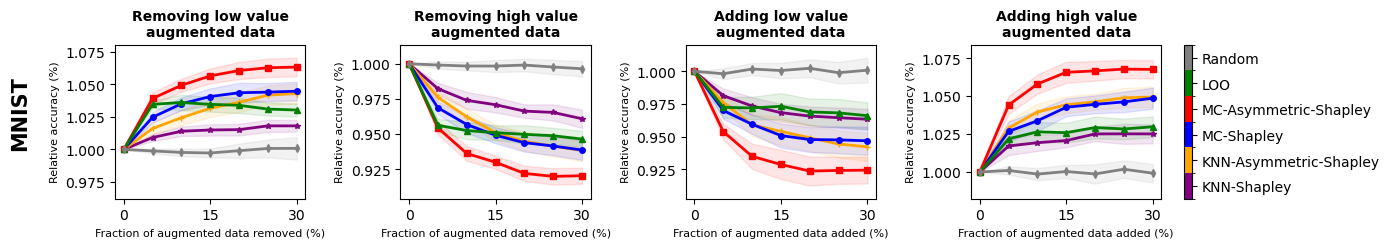

In [29]:
# Plot final plot
import matplotlib.pyplot as plt

final_plot_avg(remove_high_avg, remove_low_avg, add_high_avg, 
               add_low_avg, shap_vals_algo_plot_lst, remove_add_ratio = 30,
               xticks=[0, 15, 30], modelname='knn',
               root_dir='experiments/augmented data valuation mnist balanced samples/final plot/validation data/',
               dataset='MNIST', imbalance=False)

In [35]:
# # Final plot: heldout data

# shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
#                       'MC-Shapley', 'MC-Asymmetric-Shapley', 'LOO', 'Random']
# remove_low_avg_heldout, remove_high_avg_heldout, add_low_avg_heldout, add_high_avg_heldout = {}, {}, {}, {}
# modelname = 'knn'

# for i_sample in range(n_samples):
    
#     print('i_sample', i_sample)
#     directory = 'experiments/augmented data valuation mnist balanced samples/sample{}/'.format(i_sample+1)
    
#     remove_low_directory = directory + 'remove_low_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     remove_high_directory = directory + 'remove_high_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     add_low_directory = directory + 'add_low_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
#     add_high_directory = directory + 'add_high_fig_data_heldout_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    
#     with open(remove_low_directory, 'rb') as fp:
#         remove_low = pickle.load(fp)
    
#     with open(remove_high_directory, 'rb') as fp:
#         remove_high = pickle.load(fp)

#     with open(add_low_directory, 'rb') as fp:
#         add_low = pickle.load(fp)

#     with open(add_high_directory, 'rb') as fp:
#         add_high = pickle.load(fp)
    
#     if i_sample == 0:
#         for key in remove_low.keys():
#             remove_low_avg_heldout[key] = [np.asarray(remove_low[key])]
#             remove_high_avg_heldout[key] = [np.asarray(remove_high[key])]
        
#         for key in add_low.keys():
#             add_low_avg_heldout[key] = [np.asarray(add_low[key])]
#             add_high_avg_heldout[key] = [np.asarray(add_high[key])]
        
        
#     else:
#         for key in remove_low.keys():
#             remove_low_avg_heldout[key].append(np.asarray(remove_low[key]))
#             remove_high_avg_heldout[key].append(np.asarray(remove_high[key]))
        
#         for key in add_low.keys():
#             add_low_avg_heldout[key].append(np.asarray(add_low[key]))
#             add_high_avg_heldout[key].append(np.asarray(add_high[key]))

i_sample 0
i_sample 1
i_sample 2
i_sample 3
i_sample 4
i_sample 5
i_sample 6
i_sample 7
i_sample 8
i_sample 9


In [36]:
# for key in remove_high_avg_heldout.keys():
#     if key == 'frac_data_removed':
#         remove_high_avg_heldout[key] = remove_high_avg_heldout[key][0]
#         remove_low_avg_heldout[key] = remove_low_avg_heldout[key][0]
#     else:
#         remove_high_avg_heldout[key] = np.vstack(remove_high_avg_heldout[key])
#         remove_low_avg_heldout[key] = np.vstack(remove_low_avg_heldout[key])


# for key in add_high_avg_heldout.keys():
#     if key == 'frac_data_added':
#         add_high_avg_heldout[key] = add_high_avg_heldout[key][0]
#         add_low_avg_heldout[key] = add_low_avg_heldout[key][0]
#     else:
#         add_high_avg_heldout[key] = np.vstack(add_high_avg_heldout[key])
#         add_low_avg_heldout[key] = np.vstack(add_low_avg_heldout[key])

In [37]:
# shap_vals_algo_plot_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
#                            'MC-Shapley', 'MC-Asymmetric-Shapley', 'Random']

In [38]:
# def final_plot_avg(remove_high_avg, remove_low_avg, add_high_avg, add_low_avg, shap_algo_lst, dataset,
#                    remove_add_ratio, xticks, root_dir, imbalance=False, experiment='ex1'):
    
#     fig, axes = plt.subplots(1, 4, figsize=(15, 2))
#     dataset_font, title_font, label_font, ticks_font, legend_font = 15, 10, 8, 8, 6
    
#     # Define the color map for the methods
#     color_map = {
#         'KNN-Shapley': 'blue',
#         'KNN-Asymmetric-Shapley': 'blue',
#         'MC-Shapley': 'red',
#         'MC-Asymmetric-Shapley': 'red',
#         'LOO': 'green',
#         'Random': 'grey'
#     }

#     # Define the line style for the methods
#     line_style_map = {
#         'KNN-Shapley': 'dotted',
#         'KNN-Asymmetric-Shapley': 'solid',
#         'MC-Shapley': 'dotted',
#         'MC-Asymmetric-Shapley': 'solid',
#         'LOO':'dotted',
#         'Random': 'dotted'
#     }

#     data_lst = [remove_low_avg, remove_high_avg, add_low_avg, add_high_avg]
#     keys = ['frac_data_removed', 'frac_data_removed', 'frac_data_added', 'frac_data_added']

#     # Define subtitles and x_labels
#     if dataset == 'Traffic' and (experiment == 'ex1' or experiment == 'ex1_val_data'):
#         subtitles = ['Removing low value\nAugust data', 'Removing high value\nAugust data',
#                      'Adding low value\nAugust data', 'Adding high value\nAugust data']
#         x_labels = ['Fraction of August data removed (%)', 'Fraction of August data removed (%)',
#                     'Fraction of August data added (%)', 'Fraction of August data added (%)']
#     elif dataset == 'Traffic' and (experiment == 'ex2' or experiment == 'ex2_val_data'):
#         subtitles = ['Removing low value\nSeptember data', 'Removing high value\nSeptember data',
#                      'Adding low value\nSeptember data', 'Adding high value\nSeptember data']
#         x_labels = ['Fraction of September data removed (%)', 'Fraction of September data removed (%)',
#                     'Fraction of September data added (%)', 'Fraction of September data added (%)']
#     else:
#         subtitles = ['Removing low value\naugmented data', 'Removing high value\naugmented data',
#                      'Adding low value\naugmented data', 'Adding high value\naugmented data']
#         x_labels = ['Fraction of augmented data removed (%)', 'Fraction of augmented data removed (%)',
#                     'Fraction of augmented data added (%)', 'Fraction of augmented data added (%)']

#     # Create custom legend handles
#     legend_handles = []
#     for algo in shap_algo_lst:
#         handle, = axes[0].plot([], [], color=color_map[algo], linestyle=line_style_map[algo], lw=2, label=algo)
#         legend_handles.append(handle)

#     for i in range(len(data_lst)):
#         ymin, ymax = 1, 0
#         for j in range(len(shap_algo_lst)):
#             bool_ratio = (np.array(data_lst[i][keys[i]]) <= remove_add_ratio)
            
#             results = data_lst[i][shap_algo_lst[j]]
#             # Calculate the mean across the n repetitions
#             mean_rslts = np.mean(results, axis=0)
#             # Calculate the 90% confidence interval
#             confidence_band = 1.645 * np.std(results, axis=0) / np.sqrt(results.shape[0])
            
#             # Plotting the mean and confidence band
#             axes[i].plot(
#                 data_lst[i][keys[i]][bool_ratio], 
#                 mean_rslts[bool_ratio], 
#                 color=color_map[shap_algo_lst[j]], 
#                 linestyle=line_style_map[shap_algo_lst[j]], 
#                 lw=2
#             )
#             axes[i].fill_between(
#                 data_lst[i][keys[i]][bool_ratio],
#                 mean_rslts[bool_ratio] - confidence_band[bool_ratio], 
#                 mean_rslts[bool_ratio] + confidence_band[bool_ratio], 
#                 color=color_map[shap_algo_lst[j]], 
#                 alpha=0.1, 
#                 label="90% Confidence Band"
#             )
#             if min(mean_rslts[bool_ratio] - confidence_band[bool_ratio]) < ymin:
#                 ymin = min(mean_rslts[bool_ratio] - confidence_band[bool_ratio])
#             if max(mean_rslts[bool_ratio] + confidence_band[bool_ratio]) > ymax:
#                 ymax = max(mean_rslts[bool_ratio] + confidence_band[bool_ratio])
            
#         # Set x-ticks
#         axes[i].set_xticks(xticks)
        
#         # Set y-lim
#         if i == 0:
#             axes[i].set_ylim((ymin-0.08, ymax+0.02))
#         else:
#             axes[i].set_ylim((ymin-0.02, ymax+0.02))
            
#         # Set titles with bold font and in two lines
#         axes[i].set_title(subtitles[i], fontsize=title_font, fontweight='bold')
#         axes[i].set_xlabel(x_labels[i], fontsize=label_font)

#         # Set the y-label and add the dataset name to the first plot
#         if imbalance:
#             axes[i].set_ylabel('Prediction AUC (%)', fontsize=label_font)
#         else:
#             axes[i].set_ylabel('Prediction accuracy (%)', fontsize=label_font)

#         # Add the dataset name to the left side of the first plot
#         if i == 0:
#             axes[i].text(-0.5, 0.8, dataset, fontsize=dataset_font,
#                          fontweight='bold', 
#                          va='top', ha='center', rotation=90,
#                          transform=axes[i].transAxes)

#     # Adjust the spacing between plots to make more room for y-labels
#     plt.subplots_adjust(left=0.1, right=0.85, wspace=0.5)  # Increase wspace for more room between plots

#     # Add custom legend to the first subplot
#     axes[0].legend(handles=legend_handles, loc='lower left', fontsize=legend_font)

#     # Save the figure with bbox_inches to avoid cutting off the titles
#     plt.savefig(root_dir + 'final plot heldout data/{}_algos_final_plot_{}.jpg'.format(len(shap_algo_lst), experiment), dpi=500, 
#                 bbox_inches='tight')
#     plt.show()
#     return

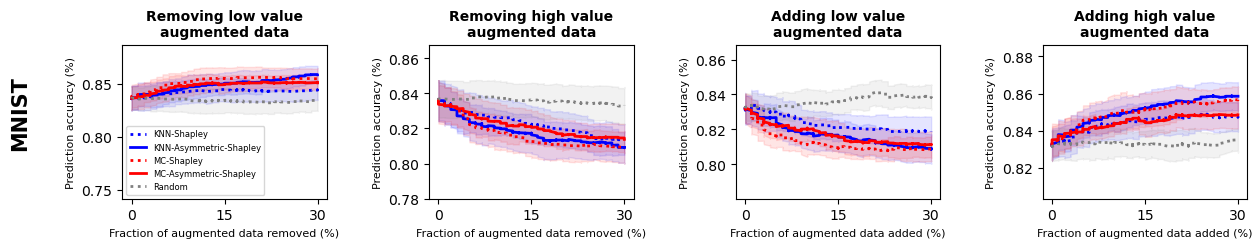

In [41]:
# # Plot final plot
# import matplotlib.pyplot as plt

# final_plot_avg(remove_high_avg_heldout, remove_low_avg_heldout, add_high_avg_heldout, 
#                add_low_avg_heldout, shap_vals_algo_plot_lst, remove_add_ratio = 30,
#                xticks=[0, 15, 30],
#                root_dir='experiments/augmented data valuation mnist balanced samples/'.format(i_sample),
#                dataset='MNIST', imbalance=False)

### 8. Analysis of Augmentation Parameters

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Sanity check

# Count the occurrences of each element in the sampled original data
element_counts = Counter(y_ori)

# Display the counts
for element, count in element_counts.items():
    print(f"Element {element}: {count} times")

In [ ]:
ratio = 0.40
cutoff = int(len(X_aug)*ratio)
aug_params = mydict['aug_params']

In [ ]:
high_asv = np.argsort(mc_asym_shap_vals)[::-1] # rank asv from high to low
high_aug_asv = [i for i in high_asv if i in s_class_dic[1]][:cutoff]
high_aug_params_each_num = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for aug in high_aug_asv:
    high_aug_params_each_num[y_ori_aug[aug]].append([aug_params[aug]['angle'], aug_params[aug]['scale'], 
                                             aug_params[aug]['dx'], aug_params[aug]['dy']])


high_aug_params_num0 = pd.DataFrame(np.vstack(high_aug_params_each_num[0]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num1 = pd.DataFrame(np.vstack(high_aug_params_each_num[1]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num2 = pd.DataFrame(np.vstack(high_aug_params_each_num[2]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num3 = pd.DataFrame(np.vstack(high_aug_params_each_num[3]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num4 = pd.DataFrame(np.vstack(high_aug_params_each_num[4]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num5 = pd.DataFrame(np.vstack(high_aug_params_each_num[5]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num6 = pd.DataFrame(np.vstack(high_aug_params_each_num[6]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num7 = pd.DataFrame(np.vstack(high_aug_params_each_num[7]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num8 = pd.DataFrame(np.vstack(high_aug_params_each_num[8]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

high_aug_params_num9 = pd.DataFrame(np.vstack(high_aug_params_each_num[9]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

In [ ]:
low_asv = np.argsort(mc_asym_shap_vals) # rank from low to high
low_aug_asv = [i for i in low_asv if i in s_class_dic[1]][:cutoff]
low_aug_params_each_num = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for aug in low_aug_asv:
    low_aug_params_each_num[y_ori_aug[aug]].append([aug_params[aug]['angle'], aug_params[aug]['scale'], 
                                                    aug_params[aug]['dx'], aug_params[aug]['dy']])


low_aug_params_num0 = pd.DataFrame(np.vstack(low_aug_params_each_num[0]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num1 = pd.DataFrame(np.vstack(low_aug_params_each_num[1]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num2 = pd.DataFrame(np.vstack(low_aug_params_each_num[2]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num3 = pd.DataFrame(np.vstack(low_aug_params_each_num[3]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num4 = pd.DataFrame(np.vstack(low_aug_params_each_num[4]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num5 = pd.DataFrame(np.vstack(low_aug_params_each_num[5]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num6 = pd.DataFrame(np.vstack(low_aug_params_each_num[6]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num7 = pd.DataFrame(np.vstack(low_aug_params_each_num[7]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num8 = pd.DataFrame(np.vstack(low_aug_params_each_num[8]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

low_aug_params_num9 = pd.DataFrame(np.vstack(low_aug_params_each_num[9]), 
                                    columns=['angle', 'scale', 'dx', 'dy'])

#### 8.1 Analysis of Augmentation Parameters - Number 0

In [ ]:
high_aug_params_num0.shape, low_aug_params_num0.shape # Sanity check

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num0['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num0['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=0)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize = legend_font_size)


sns.distplot(high_aug_params_num0['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num0['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=0)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num0['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num0['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=0)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num0['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num0['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=0)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 0/aug_params_plot.png')
plt.show()

#### 8.2 Analysis of Augmentation Parameters - Number 1

In [ ]:
high_aug_params_num1.shape, low_aug_params_num1.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num1['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num1['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=1)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize = legend_font_size)


sns.distplot(high_aug_params_num1['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num1['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=1)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num1['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num1['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=1)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num1['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num1['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=1)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure

plt.savefig(directory + 'final plot/number 1/aug_params_plot.png')
plt.show()

#### 8.3 Analysis of Augmentation Parameters - Number 2

In [ ]:
high_aug_params_num2.shape, low_aug_params_num2.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num2['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num2['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=2)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num2['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num2['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=2)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num2['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num2['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=2)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num2['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num2['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=2)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increased spacing
plt.tight_layout(pad=2.0)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 2/aug_params_plot.png')
plt.show()

#### 8.4 Analysis of Augmentation Parameters - Number 3

In [ ]:
high_aug_params_num3.shape, low_aug_params_num3.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12,12, 7,'bold'
    
sns.distplot(high_aug_params_num3['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num3['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=3)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num3['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num3['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=3)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num3['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num3['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=3)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num3['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num3['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=3)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 3/aug_params_plot.png')
plt.show()

#### 8.5 Analysis of Augmentation Parameters - Number 4

In [ ]:
high_aug_params_num4.shape, low_aug_params_num4.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num4['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num4['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=4)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num4['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num4['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=4)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num4['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num4['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=4)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num4['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num4['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=4)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 4/aug_params_plot.png')
plt.show()

#### 8.6 Analysis of Augmentation Parameters - Number 5

In [ ]:
high_aug_params_num5.shape, low_aug_params_num5.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num5['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num5['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=5)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num5['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num5['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=5)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num5['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num5['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=5)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num5['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num5['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=5)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 5/aug_params_plot.png')
plt.show()

#### 8.7 Analysis of Augmentation Parameters - Number 6

In [ ]:
high_aug_params_num6.shape, low_aug_params_num6.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num6['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num6['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=6)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num6['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num6['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=6)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num6['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num6['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=6)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num6['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num6['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=6)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 6/aug_params_plot.png')
plt.show()

#### 8.8 Analysis of Augmentation Parameters - Number 7

In [ ]:
high_aug_params_num7.shape, low_aug_params_num7.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num7['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num7['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=7)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num7['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num7['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=7)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num7['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num7['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=7)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num7['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num7['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=7)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 7/aug_params_plot.png')
plt.show()

#### 8.9 Analysis of Augmentation Parameters - Number 8

In [ ]:
high_aug_params_num8.shape, low_aug_params_num8.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num8['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num8['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=8)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num8['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num8['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=8)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num8['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num8['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=8)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num8['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num8['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=8)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 8/aug_params_plot.png')
plt.show()

#### 8.10 Analysis of Augmentation Parameters - Number 9

In [ ]:
high_aug_params_num9.shape, low_aug_params_num9.shape

In [ ]:
# Plot the distribution of augmentation parameters in high and low value data

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
title_font_size, label_font_size, legend_font_size, title_font_style = 12, 12, 7,'bold'
    
sns.distplot(high_aug_params_num9['angle'], hist=True, kde=True, label='high-value', ax=axes[0])
sns.distplot(low_aug_params_num9['angle'], hist=True, kde=True, label='low-value', ax=axes[0])
title = 'Distribution of Rotation\nAngles (Label=9)'
axes[0].set_xlabel('Angle', fontsize=label_font_size)
axes[0].set_ylabel('')
axes[0].set_title(title, fontsize=title_font_size, fontweight=title_font_style)
axes[0].legend(fontsize=legend_font_size)


sns.distplot(high_aug_params_num9['scale'], hist=True, kde=True, label='high-value', ax=axes[1])
sns.distplot(low_aug_params_num9['scale'], hist=True, kde=True, label='low-value', ax=axes[1])
title = 'Distribution of Scaling\nParameter (Label=9)'
axes[1].set_xlabel('Scale', fontsize=label_font_size)
axes[1].set_ylabel('')
axes[1].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num9['dx'], hist=True, kde=True, label='high-value', ax=axes[2])
sns.distplot(low_aug_params_num9['dx'], hist=True, kde=True, label='low-value', ax=axes[2])
title = 'Distribution of Horizontal\nShift (Label=9)'
axes[2].set_xlabel('Horizontal shift', fontsize=label_font_size)
axes[2].set_ylabel('')
axes[2].set_title(title, fontsize=title_font_size, fontweight=title_font_style)


sns.distplot(high_aug_params_num9['dy'], hist=True, kde=True, label='high-value', ax=axes[3])
sns.distplot(low_aug_params_num9['dy'], hist=True, kde=True, label='low-value', ax=axes[3])
title = 'Distribution of Vertical\nShift (Label=9)'
axes[3].set_xlabel('Vertical shift', fontsize=label_font_size)
axes[3].set_ylabel('')
axes[3].set_title(title, fontsize=title_font_size, fontweight=title_font_style)

# Adjust the spacing between plots to make more room for y-labels and titles
plt.subplots_adjust(wspace=0.4, hspace=0.1)  # Increased spacing
plt.tight_layout(pad=1)  # Add padding around the figure
    
plt.savefig(directory + 'final plot/number 9/aug_params_plot.png')
plt.show()

### 9. Visualize the high and low value data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize_ori_aug(aug_imgs_idxs, X_ori, X_ori_aug, title):
    
    title_font, dataset_font, label_font = 15, 9, 7
    
    # Create a figure with specific size and adjust spacing
    f, ax = plt.subplots(2, len(aug_imgs_idxs), figsize=(15, 4))
    f.suptitle(title, fontsize=title_font, fontweight='bold')  # Add the main title
    
    # Adjust space between rows and columns
    f.subplots_adjust(hspace=0.2, wspace=0.05)  
    
    for i in range(len(aug_imgs_idxs)):
        ax[0, i].imshow(X_ori_aug[aug_imgs_idxs[i]-len(X_ori)].reshape(28, 28), cmap='gray')
        ax[1, i].imshow(X_ori_aug[aug_imgs_idxs[i]].reshape(28, 28), cmap='gray')
        
        # Add xlabel below each image
        mc_ads_ori = '{:.4f}'.format(mc_asym_shap_vals[aug_imgs_idxs[i]-len(X_ori)])
        mc_ds_ori = '{:.4f}'.format(mc_shap_vals[aug_imgs_idxs[i]-len(X_ori)])
        
        mc_ads_aug = '{:.4f}'.format(mc_asym_shap_vals[aug_imgs_idxs[i]])
        mc_ds_aug = '{:.4f}'.format(mc_shap_vals[aug_imgs_idxs[i]])
        
        ax[0, i].set_xlabel('MC-ADS:{}\nMC-DS:{}'.format(mc_ads_ori, mc_ds_ori), fontsize=label_font)
        ax[1, i].set_xlabel('MC-ADS:{}\nMC-DS:{}'.format(mc_ads_aug, mc_ds_aug), fontsize=label_font)
        
        # Remove x-ticks and y-ticks but keep xlabels
        ax[0, i].set_xticks([])
        ax[0, i].set_yticks([])
        ax[1, i].set_xticks([])
        ax[1, i].set_yticks([])
        
        # Add the dataset name to the left side of the first plot
        if i == 0:
            ax[0, i].text(-5, 0.8, 'Original data', fontsize=dataset_font,
                         fontweight='bold', va='top', ha='center', rotation=90)
            ax[1, i].text(-5, 0.8, 'Augmented data', fontsize=dataset_font,
                         fontweight='bold', va='top', ha='center', rotation=90)
    
    # Adjust layout to fit the labels
    plt.tight_layout(rect=[0, 1, 1, 0.95])
    
    plt.show()

#### 9.1 Visualize high value data (original data and its corresponding augmentation)

In [ ]:
# For your reference:
# high_asv = np.argsort(mc_asym_shap_vals)[::-1] # rank asv from high to low
# high_aug_asv = [i for i in high_asv if i in s_class_dic[1]][:cutoff]
# high_aug_params_each_num = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

visualize_ori_aug(high_aug_asv[:10], X_ori, X_ori_aug, title='High value augmented data and its original counterpart')

#### 9.2 Visualize low value data  (original data and its corresponding augmentation)

In [ ]:
# Use the function with your data
visualize_ori_aug(low_aug_asv[:10], X_ori, X_ori_aug, title='Low value augmented data and its original counterpart')

#### 9.3 Visualize high and low value data (only the augmentations)

In [ ]:
def visualize_high_low_aug(high_aug_imgs_idxs, low_aug_imgs_idxs, X_ori_aug, y_ori_aug, title, directory):
    
    title_font, dataset_font, label_font = 18, 9, 7
    
    # Create a figure with specific size and adjust spacing
    f, ax = plt.subplots(2, len(high_aug_imgs_idxs), figsize=(15, 4))
    f.suptitle(title, fontsize=title_font, fontweight='bold')  # Add the main title
    
    # Adjust space between rows and columns
    f.subplots_adjust(hspace=0.2, wspace=0.05)  
    
    for i in range(len(high_aug_imgs_idxs)):
        ax[0, i].imshow(X_ori_aug[high_aug_imgs_idxs[i]].reshape(28, 28), cmap='gray')
        ax[1, i].imshow(X_ori_aug[low_aug_imgs_idxs[i]].reshape(28, 28), cmap='gray')
        
        # Add xlabel below each image
        mc_ads_high = '{:.4f}'.format(mc_asym_shap_vals[high_aug_imgs_idxs[i]])
        mc_ads_low = '{:.4f}'.format(mc_asym_shap_vals[low_aug_imgs_idxs[i]])
        
        ax[0, i].set_xlabel('Label:{}\nMC-ADS:{}'.format(y_ori_aug[high_aug_imgs_idxs[i]], 
                                                         mc_ads_high), fontsize=label_font)
        ax[1, i].set_xlabel('Label:{}\nMC-ADS:{}'.format(y_ori_aug[low_aug_imgs_idxs[i]], 
                                                         mc_ads_low), fontsize=label_font)
        
        # Remove x-ticks and y-ticks but keep xlabels
        ax[0, i].set_xticks([])
        ax[0, i].set_yticks([])
        ax[1, i].set_xticks([])
        ax[1, i].set_yticks([])
        
        # Add the dataset name to the left side of the first plot
        if i == 0:
            ax[0, i].text(-5, 0.8, 'High value', fontsize=dataset_font,
                         fontweight='bold', va='top', ha='center', rotation=90)
            ax[1, i].text(-5, 0.4, 'Low value', fontsize=dataset_font,
                         fontweight='bold', va='top', ha='center', rotation=90)
    
    # Adjust layout to fit the labels
    plt.tight_layout(rect=[0, 1, 1, 0.95])
    plt.savefig(directory + 'final plot/high_low_value_images_plot.png')
    plt.show()

In [ ]:
high_start_idx, high_end_idx = 0, 10
low_start_idx, low_end_idx = 20, 30
visualize_high_low_aug(high_aug_asv[high_start_idx:high_end_idx], low_aug_asv[low_start_idx:low_end_idx], 
                       X_ori_aug, y_ori_aug, title='High and low MC-ADS value augmented data', 
                       directory=directory)

In [ ]:
high_aug_asv_idx0 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==0]
high_aug_asv_idx1 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==1]
high_aug_asv_idx2 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==2]
high_aug_asv_idx3 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==3]
high_aug_asv_idx4 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==4]
high_aug_asv_idx5 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==5]
high_aug_asv_idx6 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==6]
high_aug_asv_idx7 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==7]
high_aug_asv_idx8 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==8]
high_aug_asv_idx9 = [high_aug_asv[i] for i in range(len(high_aug_asv)) if y_ori_aug[high_aug_asv[i]]==9]

In [ ]:
low_aug_asv_idx0 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==0]
low_aug_asv_idx1 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==1]
low_aug_asv_idx2 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==2]
low_aug_asv_idx3 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==3]
low_aug_asv_idx4 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==4]
low_aug_asv_idx5 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==5]
low_aug_asv_idx6 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==6]
low_aug_asv_idx7 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==7]
low_aug_asv_idx8 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==8]
low_aug_asv_idx9 = [low_aug_asv[i] for i in range(len(low_aug_asv)) if y_ori_aug[low_aug_asv[i]]==9]

In [ ]:
high_value_img_idxs = [high_aug_asv_idx0[1], high_aug_asv_idx1[0],
                       high_aug_asv_idx2[0], high_aug_asv_idx3[1],
                       high_aug_asv_idx4[3], high_aug_asv_idx5[0],
                       high_aug_asv_idx6[1], high_aug_asv_idx7[0],
                       high_aug_asv_idx8[0], high_aug_asv_idx9[2]]

low_value_img_idxs = [low_aug_asv_idx0[1], low_aug_asv_idx1[0],
                      low_aug_asv_idx2[2], low_aug_asv_idx3[3],
                      low_aug_asv_idx4[2], low_aug_asv_idx5[1],
                      low_aug_asv_idx6[0], low_aug_asv_idx7[0],
                      low_aug_asv_idx8[0], low_aug_asv_idx9[0]]

visualize_high_low_aug(high_value_img_idxs, low_value_img_idxs, 
                       X_ori_aug, y_ori_aug, directory=directory,
                       title='High and low MC-ADS value MNIST images')